<a href="https://colab.research.google.com/github/Yuzerzef/Total-sales-prediction-using-linear-and-non-linear-regression-/blob/main/total_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cinema-ticket/cinemaTicket_Ref.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/kaggle/input/cinema-ticket/cinemaTicket_Ref.csv")
df.head()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5


In [ ]:
df.shape

(142524, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   film_code     142524 non-null  int64  
 1   cinema_code   142524 non-null  int64  
 2   total_sales   142524 non-null  int64  
 3   tickets_sold  142524 non-null  int64  
 4   tickets_out   142524 non-null  int64  
 5   show_time     142524 non-null  int64  
 6   occu_perc     142399 non-null  float64
 7   ticket_price  142524 non-null  float64
 8   ticket_use    142524 non-null  int64  
 9   capacity      142399 non-null  float64
 10  date          142524 non-null  object 
 11  month         142524 non-null  int64  
 12  quarter       142524 non-null  int64  
 13  day           142524 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 15.2+ MB


# Filling null values with mean

In [ ]:
df.isnull().sum()

film_code         0
cinema_code       0
total_sales       0
tickets_sold      0
tickets_out       0
show_time         0
occu_perc       125
ticket_price      0
ticket_use        0
capacity        125
date              0
month             0
quarter           0
day               0
dtype: int64

In [ ]:
df['occu_perc'] = df['occu_perc'].fillna((df['occu_perc'].mean()))
df['capacity'] = df['capacity'].fillna((df['capacity'].mean()))
df.isnull().sum()

film_code       0
cinema_code     0
total_sales     0
tickets_sold    0
tickets_out     0
show_time       0
occu_perc       0
ticket_price    0
ticket_use      0
capacity        0
date            0
month           0
quarter         0
day             0
dtype: int64

In [ ]:
df.describe()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,month,quarter,day
count,142524.000000,142524.000000,1.425240e+05,142524.000000,142524.000000,142524.000000,142524.000000,142524.000000,142524.000000,142524.000000,142524.000000,142524.000000,142524.000000
mean,1518.985111,320.378427,1.234728e+07,140.137570,0.237413,3.932103,19.965986,81234.599886,139.900157,854.723605,6.776852,2.634721,16.112585
std,36.184450,159.701229,3.065486e+07,279.758733,2.923206,3.056276,22.643509,33236.599278,279.564935,952.700045,2.195843,0.809692,8.949471
min,1471.000000,32.000000,2.000000e+04,1.000000,0.000000,1.000000,0.000000,483.870968,-219.000000,-2.000000,2.000000,1.000000,1.000000
25%,1485.000000,181.000000,1.260000e+06,18.000000,0.000000,2.000000,3.760000,60000.000000,18.000000,277.777778,5.000000,2.000000,8.000000
50%,1498.000000,324.000000,3.720000e+06,50.000000,0.000000,3.000000,10.370000,79454.235185,50.000000,526.028883,7.000000,3.000000,16.000000
75%,1556.000000,474.000000,1.110000e+07,143.000000,0.000000,5.000000,28.190000,100000.000000,143.000000,1037.746584,9.000000,3.000000,24.000000
max,1589.000000,637.000000,1.262820e+09,8499.000000,311.000000,60.000000,147.500000,700000.000000,8499.000000,9692.097160,11.000000,4.000000,31.000000


# Correlation plot of the dataset 

**Some of the features show strong correlation with the target such as ticket sold and total sales which showed strong correlation of 0.92 in addition show-time and total sales show good correlation of 0.51 also capacity of the cinema and the total sales show correlation of 0.38.**

<AxesSubplot:>

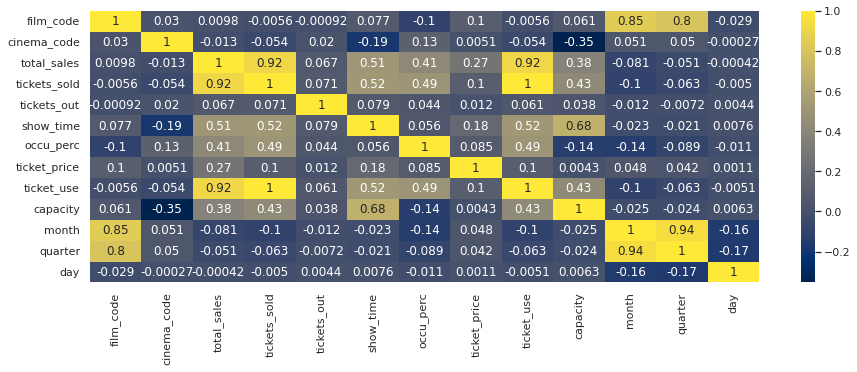

In [ ]:
sns.set_theme(color_codes=True)
sns.set_theme(style="darkgrid")
plt.figure(figsize = (15,5))
sns.heatmap(df.corr()  ,annot = True , cmap="cividis")

# Investigating features that have high correlation with the target 

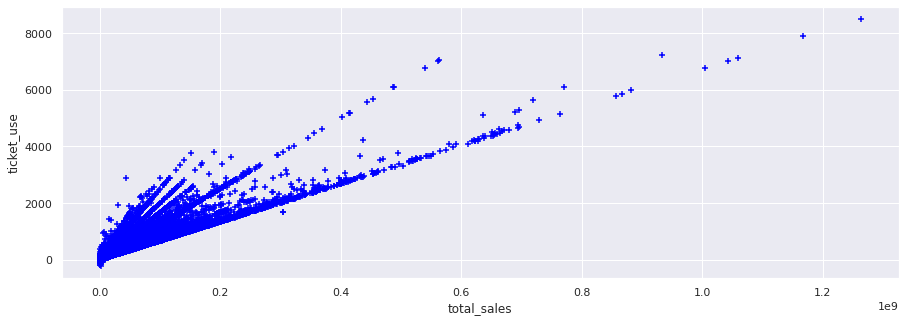

In [ ]:
%matplotlib inline
sns.set_theme(color_codes=True)
sns.set_theme(style="darkgrid")
plt.figure(figsize = (15,5))
plt.xlabel('total_sales')
plt.ylabel('ticket_use')
plt.scatter(df.total_sales,df.ticket_use,color='blue',marker='+')

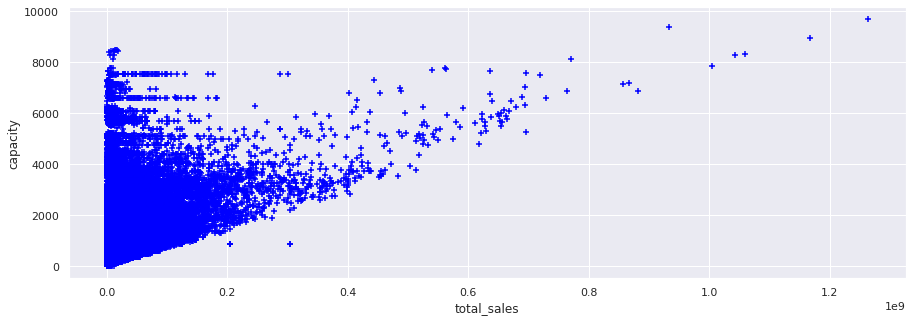

In [ ]:
%matplotlib inline
sns.set_theme(color_codes=True)
sns.set_theme(style="darkgrid")
plt.figure(figsize = (15,5))
plt.xlabel('total_sales')
plt.ylabel('capacity')
plt.scatter(df.total_sales,df.capacity,color='blue',marker='+')

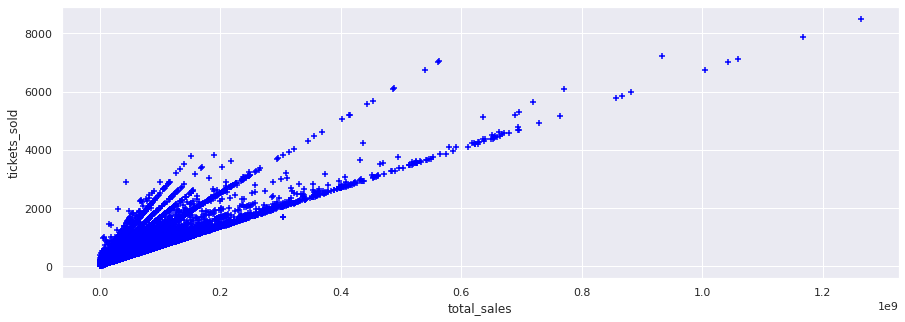

In [ ]:
%matplotlib inline
sns.set_theme(color_codes=True)
sns.set_theme(style="darkgrid")
plt.figure(figsize = (15,5))
plt.xlabel('total_sales')
plt.ylabel('tickets_sold')
plt.scatter(df.total_sales,df.tickets_sold,color='blue',marker='+')

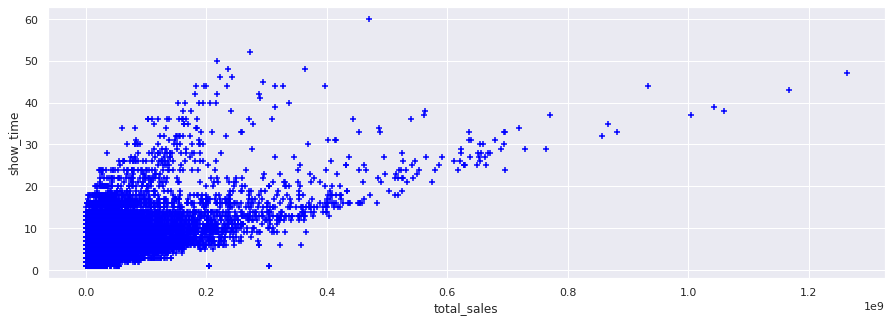

In [ ]:
%matplotlib inline
sns.set_theme(color_codes=True)
sns.set_theme(style="darkgrid")
plt.figure(figsize = (15,5))
plt.xlabel('total_sales')
plt.ylabel('show_time')
plt.scatter(df.total_sales,df.show_time,color='blue',marker='+')

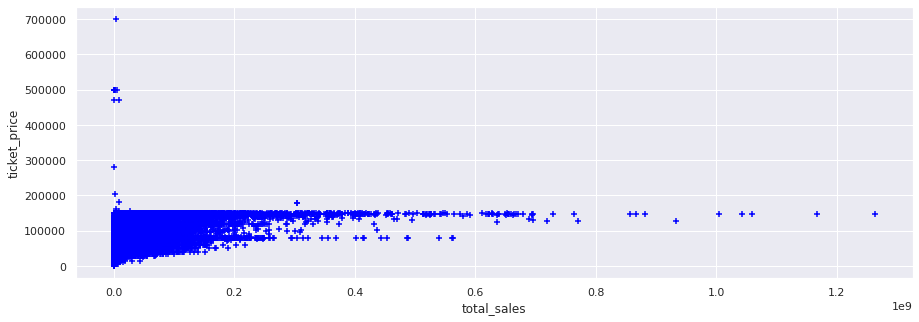

In [ ]:
%matplotlib inline
sns.set_theme(color_codes=True)
sns.set_theme(style="darkgrid")
plt.figure(figsize = (15,5))
plt.xlabel('total_sales')
plt.ylabel('ticket_price')
plt.scatter(df.total_sales,df.ticket_price,color='blue',marker='+')

# Target normalization using log scale

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


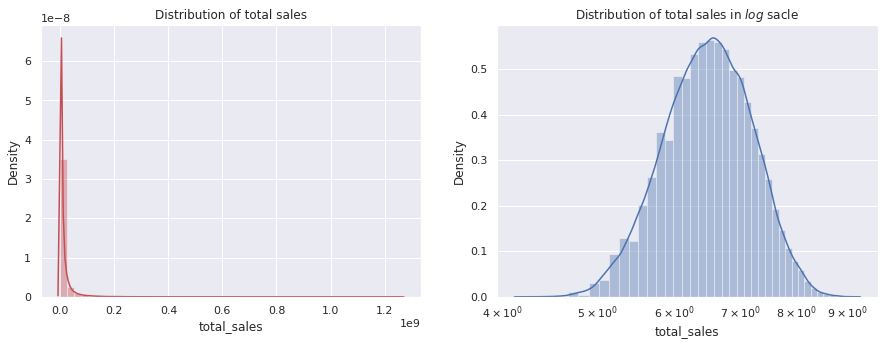

In [ ]:
f= plt.figure(figsize=(15,5))

ax=f.add_subplot(121)
sns.distplot(df['total_sales'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of total sales')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['total_sales']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of total sales in $log$ sacle')
ax.set_xscale('log');

# Spliting the data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split
X = df[['tickets_sold','occu_perc',
             'capacity', 'show_time','ticket_price','ticket_use']]
y = np.log10(df['total_sales'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30)

# Data normalization 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
x_train = scaling.transform(X_train)
x_test = scaling.transform(X_test)

# Linear regression 

**only features which has high correlation with the target is selected for the model building**

In [ ]:
from sklearn import linear_model
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = reg.predict(x_test)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


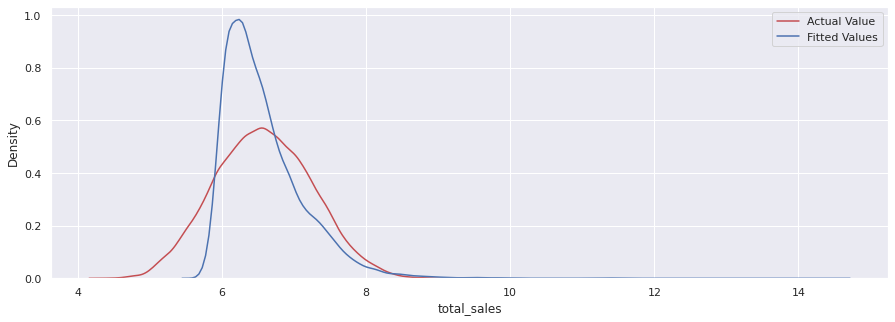

In [ ]:
sns.set_theme(color_codes=True)
sns.set_theme(style="darkgrid")
plt.figure(figsize = (15,5))
ax1 = sns.distplot(y_test, hist=False, color='r', label='Actual Value')
sns.distplot(y_pred, hist=False, color='b', label='Fitted Values', ax=ax1)
ax1.ticklabel_format(style='plain')
plt.legend(loc='best')
plt.show()

# Model evaluation

In [ ]:
import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(y_test,y_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 0.29685893717309403
MSE: 0.1406712694905156
RMSE: 0.3750616875802107
R-Squared: 0.6876061921102878


#### the predicted values and the actual values are qiute close 

In [ ]:
df_actual_pre ={'Actual': y_test, 'Predicted': y_pred}
df1_actual_pre= pd.DataFrame(df_actual_pre)
df1_actual_pre.head(10)

,Actual,Predicted
138130,5.748188,6.062517
4669,6.133539,6.100696
125828,6.666518,6.399685
48176,6.494155,6.374911
21179,6.292256,6.238935
131891,6.577492,6.235690
22956,5.845098,5.984222
139850,7.445604,6.953395
12246,7.256718,6.698770
25124,6.722634,6.541335


# Non linear regression (knn)
**let's see if we can improve the performance of the model using non linear regression (knn)**

In [ ]:
from sklearn import neighbors
n_neighbors = 3

for i, weights in enumerate(["uniform", "distance"]):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights, leaf_size=3)
    knn.fit(x_train, y_train)
    y_pred2 = knn.predict(x_test)

In [ ]:
knn

KNeighborsRegressor(leaf_size=3, n_neighbors=3, weights='distance')

# model evaluation 

In [ ]:
import sklearn.metrics as metrics
import numpy as np
mae = metrics.mean_absolute_error(y_test, y_pred2)
mse = metrics.mean_squared_error(y_test, y_pred2)
rmse = np.sqrt(mse) # or mse**(0.5)
r2 = metrics.r2_score(y_test,y_pred2)
print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 0.021981452527660237
MSE: 0.002870756983343082
RMSE: 0.05357944553038116
R-Squared: 0.9936248054858636


In [ ]:
df_actual_pre2 ={'Actual': y_test, 'Predicted': y_pred2}
df1_actual_pre2= pd.DataFrame(df_actual_pre2)
df1_actual_pre2.head(10)

,Actual,Predicted
138130,5.748188,5.748188
4669,6.133539,6.134966
125828,6.666518,6.660067
48176,6.494155,6.441416
21179,6.292256,6.373247
131891,6.577492,6.606941
22956,5.845098,6.018286
139850,7.445604,7.435003
12246,7.256718,7.275293
25124,6.722634,6.721689


# conclusion

**When comparing multiple linear regression and nonlinear regression (the kNN regressor), the kNN regressor outperformed the linear one across all matrices. The KNN regressor obtained very low MAE, RMSE, and MSE, and a high R-squared compared to that of multiple linear regression. Even though the data showed some sort of linearity, but still the linear model did not compete with the nonlinear KNN regressor model on this dataset.**
